<a href="https://colab.research.google.com/github/amsaghiri/Multi-armed-bandit/blob/main/MABgame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

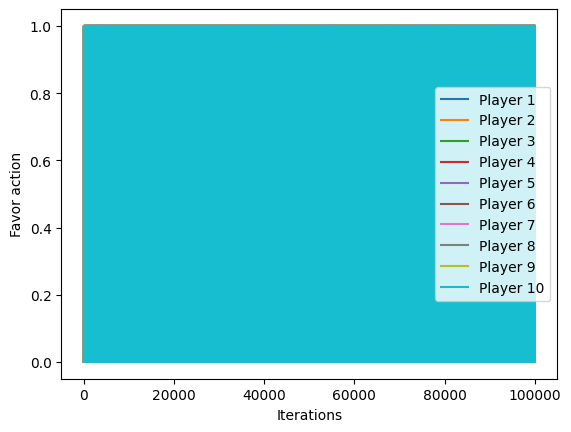

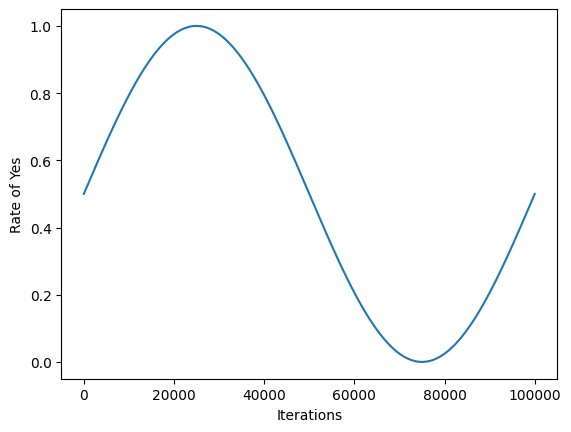

In [6]:
import numpy as np
import matplotlib.pyplot as plt


class Bandit:
    def __init__(self, n_arms, epsilon, alpha):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.alpha = alpha
        self.q = np.zeros(n_arms)
        self.actions = []
        self.rewards = []
        self.optimal = []

    def epsilon_greedy(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.q)

    def update_action_value(self, action, reward):
        self.q[action] += self.alpha * (reward - self.q[action])
        return self.q[action]

    def run(self, num_iterations):
        self.actions = np.zeros(num_iterations)
        self.rewards = np.zeros(num_iterations)
        self.optimal = np.zeros(num_iterations)

        for t in range(num_iterations):
            action = self.epsilon_greedy()
            self.actions[t] = action
            reward = self.rewards[t]
            self.rewards[t] = reward
            optimal_action = np.argmax(self.q)
            self.optimal[t] = action == optimal_action
            self.update_action_value(action, reward)

        results = {
            'actions': self.actions,
            'rewards': self.rewards,
            'optimal': self.optimal
        }

        return results


class Node:
    def __init__(self, id):
        self.id = id
        self.bandit = None


class Graph:
    def __init__(self, nodes):
        self.nodes = nodes

    def add_node(self, node):
        self.nodes.append(node)

    def get_nodes(self):
        return self.nodes


class Environment:
    def __init__(self, r):
        self.r = r

    def get_reward(self, rate_yes):
        if np.random.random() < rate_yes:
            return self.r
        else:
            return 0


# Setting
num_iteration = 100000
r = 2
number_players = 10
rate_yes_list = []

# Set third action as the favored action!
environment = Environment(r)
graph = Graph([])


def probability_players(i):
    switcher = {
        0: [0.4, 0.6],
        1: [0.45, 0.55],
        2: [0.1, 0.9],
        3: [0.3, 0.7],
        4: [0.45, 0.55],
        5: [0.35, 0.65],
        6: [0.35, 0.65],
        7: [0.2, 0.8],
        8: [0.5, 0.5],
        9: [0.6, 0.4]
    }
    return switcher.get(i)


for i in range(number_players):
    node = Node(i + 1)
    bandit_instance = Bandit(2, 0.1, 0.1)
    node.bandit = bandit_instance
    graph.add_node(node)

for index_num_iteration in range(num_iteration):
    rate_yes = (1 + np.sin(2 * np.pi * index_num_iteration / num_iteration)) / 2
    rate_yes_list.append(rate_yes)
    action_selected_list = []

    for node in graph.get_nodes():
        favor_action = node.bandit.epsilon_greedy()
        reward = environment.get_reward(rate_yes)
        node.bandit.rewards.append(reward)
        node.bandit.actions.append(favor_action)
        node.bandit.update_action_value(favor_action, reward)
        action_selected_list.append(favor_action)

    index_num_iteration += 1

# Plotting
for node in graph.get_nodes():
    plt.plot(range(num_iteration), node.bandit.actions, label="Player {}".format(node.id))

plt.xlabel("Iterations")
plt.ylabel("Favor action")
plt.legend()
plt.show()

plt.plot(range(num_iteration), rate_yes_list)
plt.xlabel("Iterations")
plt.ylabel("Rate of Yes")
plt.show()
